# Logistic Regression

In this checkpoint, we are going to work again on the Titanic data set, but this time we will use logistic regression to predict if a passenger will survive or not. 



1. Apply logistic regression. 

2. Use confusion matrix to validate your model. 

3. Another validation matrix for classification is ROC / AUC , do your research on them explain them and apply them in our case

In [178]:
import pandas as pd

In [179]:
data = pd.read_csv('titanic-passengers.csv', sep= ';')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [180]:
data.drop(['PassengerId','Name', 'Parch', 'Ticket', 'Fare', 'SibSp'], axis = 1, inplace = True)

## Data NAN

In [181]:
data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Cabin       687
Embarked      2
dtype: int64

In [182]:
data['Embarked'].fillna(data.Embarked.dropna().mode()[0], inplace = True)

data['Cabin'].fillna('Z', inplace = True)

for inx in data.index:
    data.loc[inx,'Cabin'] = (list(data.loc[inx, 'Cabin'])[0])
    
    
def add_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        return int(data[data["Pclass"] == Pclass]["Age"].mean())
    else:
        return Age
    
data["Age"] = data[["Age", "Pclass"]].apply(add_age,axis=1)

# StandardScaler / LabelBinarize

In [189]:
from sklearn.preprocessing import StandardScaler

data['Age'] = StandardScaler().fit_transform(data['Age'].values.reshape(-1, 1))

In [190]:
data_sex = pd.get_dummies(data['Sex']).rename(columns={'male': 'isMale'}).drop('female', axis = 1)
data_embarked = pd.get_dummies(data['Embarked'])
data_cabin = pd.get_dummies(data['Cabin'])
data_class = pd.get_dummies(data['Pclass']).rename(columns={ 1: 'First', 2 : 'Second', 3 : 'Third'})

In [191]:
data = pd.concat([data, data_sex, data_embarked, data_class,data_cabin], axis = 1)
data.drop(['Pclass','Sex','Embarked','Cabin'], axis = 1, inplace = True)

In [192]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
lb.fit(data['Survived'])
data['Survived'] = lb.transform(data['Survived'])

In [193]:
data.head()

,Survived,Age,isMale,C,Q,S,First,Second,Third,A,B,C,D,E,F,G,T,Z
0,0,-0.094870,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1
1,0,-0.322065,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0
2,0,-0.700722,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
3,0,-0.019139,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
4,0,0.132324,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0


# Model LogisticRegression

In [194]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

model_log = LogisticRegression()

X = data.drop('Survived',axis=1)
y = data["Survived"]


size = 0.20
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=size,random_state=0)

In [195]:
model_log.fit(X_train,y_train)

LogisticRegression()

In [196]:
predictions = model_log.predict(X_test)
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       118
           1       0.80      0.61      0.69        61

    accuracy                           0.82       179
   macro avg       0.81      0.77      0.78       179
weighted avg       0.81      0.82      0.81       179



Nous avons une précision de 82%

In [197]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predictions)

array([[109,   9],
       [ 24,  37]], dtype=int64)

Vrai positif: 109 (Nous avons prédit un résultat positif et c'était positif)

Vrai négatif: 37 (Nous avons prédit un résultat négatif et c'était négatif)

Faux positif: 09 (Nous avons prédit un résultat positif et c'était négatif)

Faux négatif: 24 ( Nous avons prédit un résultat négatif et c'était positif)

# ROC : receiver operating characteristic

Une courbe ROC **(receiver operating characteristic)** est un graphique représentant les performances d'un modèle de classification pour tous les seuils de classification.

Cette courbe trace le taux de vrais positifs en fonction du taux de faux positifs :

- Taux de vrais positifs := **(vrais positifs) / ( vrais positifs +  faux négatifs)**
- Taux de faux positifs := **(faux positifs) / ( faux positifs +  vrais négatifs)**

AUC signifie **"aire sous la courbe ROC"**. Cette valeur mesure l'intégralité de l'aire à deux dimensions située sous l'ensemble de la courbe ROC (par calculs d'intégrales) de (0,0) à (1,1).

In [198]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import numpy as np

In [246]:
X = scaler.fit_transform(data.drop('Survived',axis=1))
y = data["Survived"]

size = 0.20
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=size,random_state=0)

In [249]:
classifier = LogisticRegression(random_state=0, multi_class='ovr')
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

In [252]:
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

In [253]:
import matplotlib.pyplot as plt

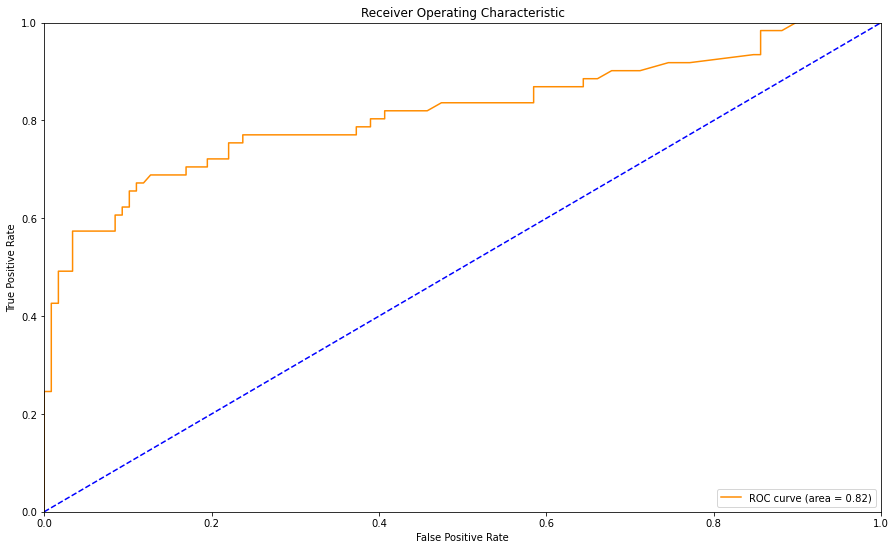

In [258]:
plt.figure(figsize=(15,9))

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='ROC curve (area = %0.2f)' % roc_auc , color='darkorange',)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'b--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()